## Linear Regression:

* Goals:
  * To understand the concept of Linear Regression
  * To understand the uses of Linear Regression
  * To implement Linear Regression in Python

* Pre-requisites:
  * Understanding of Hypothesis Testing and p-value
  * Inferential Statistics
 
---------------
Hypothesis Testing in Mathematical Concepts/ Terminology

## Introduction to Linear Regression

**What is linear regression?**

Linear regression is a technique (statistical method) used to model the relationship between a dependent variable (target variable) and one or more independent variables (predictor variables/labels). It attempts to find the best-fitting line (or hyperplane) through the data points.

**Why is it important in data analysis and machine learning?**

As Data Scientists and Machine Learning Engineers, it is our work to make predict model.
Linear Regression is one of the foundational techniques used for this.

Linear regression is a fundamental technique in data analysis and machine learning for several reasons:

    * Predictive power: It can be used to predict numerical values based on input features.
    * Understanding relationships: It helps uncover relationships between variables.
    * Simplicity: It's relatively easy to understand and implement.
    * Foundation for other models: Many complex models are built upon linear regression concepts.

## **Let's Try to Understand Linear Regression with a Problem Statement:**

#### Problem Example:
We have a dataset of houses with their sizes (in square feet) and their corresponding prices. How do we predict the price of a new house based on its size?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)
X = np.linspace(1000, 5000, 100).reshape(-1, 1)  # House sizes from 1000 to 5000 sq ft
y = 100000 + 200 * X + np.random.randn(100, 1) * 50000  # Price = base + rate * size + noise

* Step 1: Visualize the problem
Let's imagine plotting this data on a graph, with house size on the x-axis and price on the y-axis. We might notice that as the size increases, the price tends to increase as well.

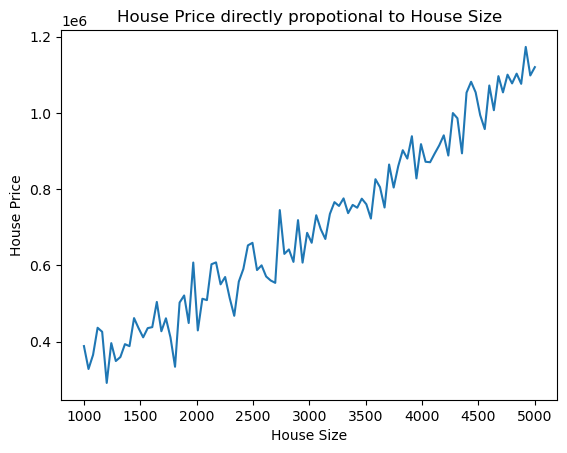

In [3]:
fig, ax = plt.subplots()
ax.plot(X, y);
ax.set_xlabel("House Size")
ax.set_ylabel("House Price")
ax.set_title("House Price directly propotional to House Size");

* Step 2: Propose a simple model
The simplest way to model this relationship is with a straight line. This is where the "linear" in Linear Regression comes from.
* Step 3: Formulate the linear equation
We can represent this line with the equation:
    * `y = mx + b`
    where:
        * y is the predicted price
        * x is the house size
        * m is the slope of the line (how much price increases for each unit increase in size)
        * b is the y-intercept (the base price when size is zero)
* Step 4: Define the goal
Our goal is to find the best values for m and b so that our line fits the data as closely as possible.

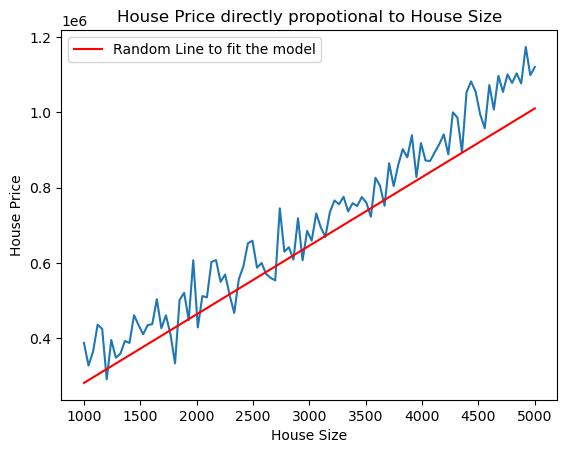

In [4]:
# y = mx + c
# When generating synthetic data
# y = 100000 + 200 * X + np.random.randn(100, 1) * 50000  # Price = base + rate * size + noise 
y_preds_r1 = 100000 + np.random.randint(150,200, 1) * X # Let's create a randomline for our demonstration

fig, ax = plt.subplots()
ax.plot(X, y, );
ax.set_xlabel("House Size")
ax.set_ylabel("House Price")
ax.set_title("House Price directly propotional to House Size")
ax.plot(X, y_preds_r1, color="red", label="Random Line to fit the model")
ax.legend();

* Step 5: Introduce the concept of error
For each data point, there will likely be a difference between the actual price and the price our line predicts. This difference is called the error or residual.
* Step 6: Define the best fit
The "best" line is the one that minimizes these errors across all data points. Specifically, we want to minimize the sum of the squared errors (to penalize large errors more and to avoid positive and negative errors canceling out).

In [5]:
# Calculating Sum of Squared Errors:
squared_errors = np.square(y - y_preds_r1)
sum_of_squared_errors = np.sum(squared_errors)
sum_of_squared_errors

604619952069.1648

**The Sum of Squared Errors (SSE) is a common metric used to evaluate the performance of regression models. A lower SSE indicates a better fit of the model to the data.**

Step 7: Introduce the Method of Ordinary Least Squares (OLS)

Ordinary Least Squares (OLS) is a statistical method used to find the best-fitting line through a set of data points. The "best fit" is determined by minimizing the sum of the squared differences between the observed values and the predicted values.
Step 8: Solve for m and b

To find the specific line that best fits the data, we need to determine the values of m (slope) and b (intercept) in the equation y = mx + b.

OLS provides formulas for calculating these values:

$Slope (m):$
    `m = (n * Σxy - Σx * Σy) / (n * Σx² - (Σx)²)`
    
$Intercept (b):$
    `b = (Σy - m * Σx) / n`

Where:
  * `n` is the number of data points
  * `Σxy` is the sum of the product of corresponding x and y values
  * `Σx` is the sum of all x values
  * `Σy` is the sum of all y values
  * `Σx²` is the sum of the squared x values

These formulas, derived through calculus by minimizing the sum of squared errors, provide the optimal values for m and b that define the best-fitting line.

Note: While these formulas are fundamental to understanding linear regression, in practice, libraries like NumPy and Scikit-learn provide efficient implementations for calculating these values.

* Step 9: Apply the model
Once we have m and b, we can use our equation to predict the price of any house given its size.
Assumptions of Linear Regression:

Linearity: The relationship between x and y is linear.
Independence: The observations are independent of each other.
Homoscedasticity: The variance of residual is the same for any value of x.
Normality: For any fixed value of x, y is normally distributed.
No or little multicollinearity: The independent variables are not highly correlated with each other.
No outliers: The data doesn't have significant outliers that could skew the results.

In [35]:
# Perform linear regression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

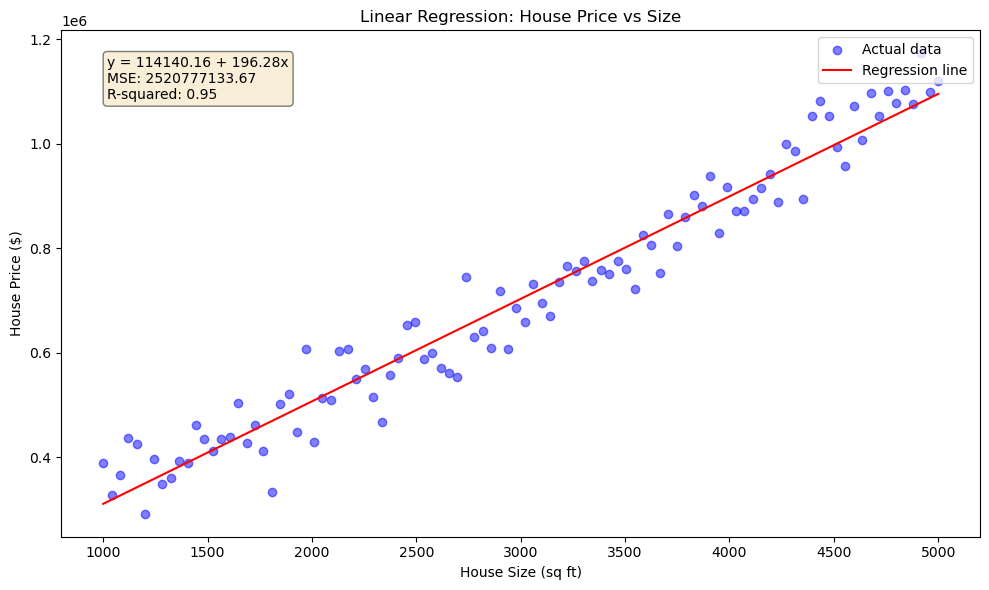

Intercept: 114140.16
Coefficient: 196.28
Predicted price for a 3500 sq ft house: $801132.11


In [36]:
# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred) # SSE/len(X)
r2 = r2_score(y, y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('Linear Regression: House Price vs Size')
plt.legend(loc="upper right")

# Add text box with model details
textstr = f'y = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f}x\n'
textstr += f'MSE: {mse:.2f}\n'
textstr += f'R-squared: {r2:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Print coefficients
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

# Demonstrate prediction
new_size = np.array([[3500]])
predicted_price = model.predict(new_size)
print(f"Predicted price for a 3500 sq ft house: ${predicted_price[0][0]:.2f}")

In [37]:
squared_errors_LR = np.square(y - y_pred)
sum_of_squared_errors_LR = np.sum(squared_errors_LR)
print(sum_of_squared_errors - sum_of_squared_errors_LR, " is the improvement in SSE")

32589509048.95233  is the improvement in SSE


In [38]:
# Let's check RooT Mean Square Error for more intuitive approach:
rmse_r1 = np.sqrt(sum_of_squared_errors/len(X))
rmse_LR = np.sqrt(sum_of_squared_errors_LR/len(X))
print(f"Root Mean Square Error:\nFor Our Random Line: {rmse_r1}\nFor Our Linear Regression: {rmse_LR}")

Root Mean Square Error:
For Our Random Line: 53354.21468038917
For Our Linear Regression: 50207.341432020985


**RMSE is a more interpretable metric than the Sum of Squared Errors (SSE) as it represents the average magnitude of the error in the same units as the dependent variable.** (Dollar$$ Here)

## Basic Principles of Linear Regression

### The Concept of a Line

A line is defined by its slope and intercept.

    Slope: Measures the steepness of the line. It represents the change in the dependent variable for a unit change in the independent variable.
    Intercept: The point where the line crosses the y-axis. It represents the value of the dependent variable when the independent variable is zero.   

The equation of a line is given by:

`y = mx + b`

where:

    y: dependent variable
    m: slope
    x: independent variable
    b: intercept

### Relationship Between Variables

    Independent (predictor) variable: The variable that is used to predict the value of the dependent variable.
    Dependent (response) variable: The variable that we want to predict.

Correlation measures the strength and direction of the linear relationship between two variables. Causation implies that one variable directly influences another. It's important to note that correlation does not imply causation.
3. Simple Linear Regression

## Mathematical Formulation

Simple linear regression models the relationship between a single independent variable (x) and a dependent variable (y) using a linear equation:

y = β₀ + β₁x + ε

where:

    y: dependent variable
    β₀: intercept (the expected value of y when x is zero)
    β₁: slope (the change in y for a one-unit increase in x)
    x: independent variable
    ε: error term (the difference between the observed value of y and the predicted value from the line)

### Assumptions of Linear Regression

Linear regression makes several assumptions about the data:

    Linearity: The relationship between the independent and dependent variables is linear.
    Independence: The observations are independent of each other.
    Homoscedasticity: The variance of the error term is constant for all values of 1 x.
    Normality: The error terms are normally distributed.

Note: In the subsequent notebooks, we will delve deeper into these concepts, provide code examples, and explore visualizations to solidify understanding.